In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os.path
from pathlib import Path

import json
import pyam
import scmdata
import pandas as pd
import numpy as np
from pymagicc.io import MAGICCData

import utils

## plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
ID = "sb_noSRM_inclu"

<IPython.core.display.Javascript object>

In [4]:
data_all = pd.read_csv(
    str(Path(utils.DATA_DIR / "plotting_data" / "figure4" / f"{ID}_4c.csv"))
)

<IPython.core.display.Javascript object>

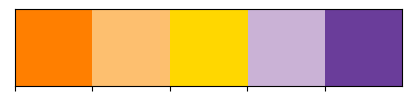

<IPython.core.display.Javascript object>

In [5]:
colors_TCRE = [
    # "saddlebrown",
    sns.color_palette("Paired")[7],
    sns.color_palette("Paired")[6],
    "gold",
    sns.color_palette("Paired")[8],
    sns.color_palette("Paired")[9],
    #   "brown",
]
sns.palplot(colors_TCRE)

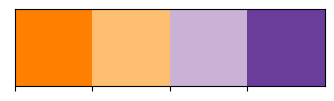

<IPython.core.display.Javascript object>

In [6]:
colors_netzero = [
    # "saddlebrown",
    sns.color_palette("Paired")[7],
    sns.color_palette("Paired")[6],
    #  "gold",
    sns.color_palette("Paired")[8],
    sns.color_palette("Paired")[9],
    #   "brown",
]
sns.palplot(colors_netzero)

In [8]:
data_all["Cum emissions peak-warming 1.5°C"] = pd.cut(
    data_all["cumulative_emms_peak_warming_to_15"],
    [-1.5e7, -3e6, -7e5, -2e5, 0, 2e6],
    labels=["< -3e6", "-3e6 - -7e5", "-7e5 - -2e5", "-2e5 - 0", "> 0"],
)

data_all["Year of net-zero CO2"] = pd.cut(
    data_all["net-zero_year"],
    [0, 2050, 2100, 2150, 2500],
    labels=["<2050", "2050-2100", "2100-2150", ">2150"],
    # labels=["<0.01", "0.01-0.02", "0.02-0.05", "0.05-0.2", "0.2-0.3", ">0.3"],
)

<IPython.core.display.Javascript object>

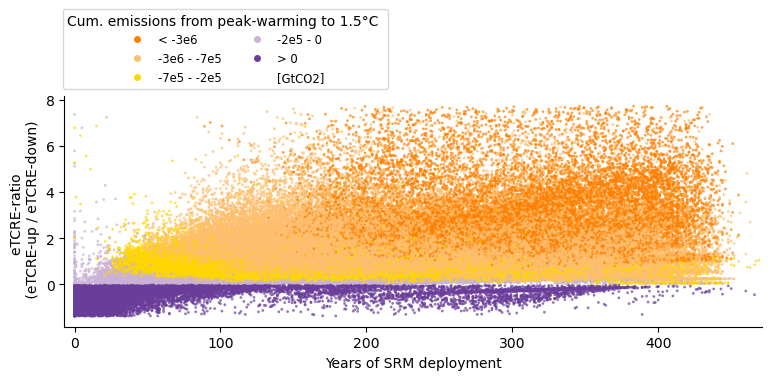

<IPython.core.display.Javascript object>

In [9]:
fig, ax = plt.subplots(figsize=(9, 3))

sns.scatterplot(
    x="SRM_at_first_crossing",
    y="TCRE_ratio_up",
    data=data_all,
    hue="Cum emissions peak-warming 1.5°C",
    ec=None,
    s=4,
    alpha=0.7,
    palette=colors_TCRE,
    legend=True
    #  palette=sns.color_palette("rocket", as_cmap=True),
    # palette=sns.color_palette("gray"),
    # palette=sns.cubehelix_palette(start=5, rot=0, dark=0, light=0.95, reverse=False, as_cmap=True),
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlim(-7, 471)
# plt.ylim(-2.7, 12)


smaller1 = mlines.Line2D(
    [],
    [],
    color=colors_TCRE[0],
    marker="o",
    linestyle="None",
    markersize=4,
    label="< -3e6",
)
CDR15 = mlines.Line2D(
    [],
    [],
    color=colors_TCRE[1],
    marker="o",
    linestyle="None",
    markersize=4,
    label="-3e6 - -7e5",
)
CDR515 = mlines.Line2D(
    [],
    [],
    color=colors_TCRE[2],
    marker="o",
    linestyle="None",
    markersize=4,
    label="-7e5 - -2e5",
)
CDR1525 = mlines.Line2D(
    [],
    [],
    color=colors_TCRE[3],
    marker="o",
    linestyle="None",
    markersize=4,
    label="-2e5 - 0",
)
larger25 = mlines.Line2D(
    [],
    [],
    color=colors_TCRE[4],
    marker="o",
    linestyle="None",
    markersize=4,
    label="> 0",
)
unit = mlines.Line2D(
    [],
    [],
    color="white",
    marker="o",
    linestyle="None",
    markersize=4,
    label="[GtCO2]",
)

cur_pol = mlines.Line2D(
    [],
    [],
    color="black",
    marker="o",
    linestyle="None",
    markersize=4,
    label="current 2100 NDC-projections",
)


plt.legend(
    title="Cum. emissions from peak-warming to 1.5°C ",
    fontsize="small",
    bbox_to_anchor=(0.472, 1.4),
    ncol=2,
    handles=[smaller1, CDR15, CDR515, CDR1525, larger25, unit],
)


plt.xlabel("Years of SRM deployment")
# plt.xlabel("eTCRE-up / eTCRE-down")
plt.ylabel("eTCRE-ratio \n (eTCRE-up / eTCRE-down)")

plt.savefig(
    str(Path(utils.PLOTS_DIR / "figure4" / f"{ID}_4c.png")), bbox_inches="tight"
)
plt.show()

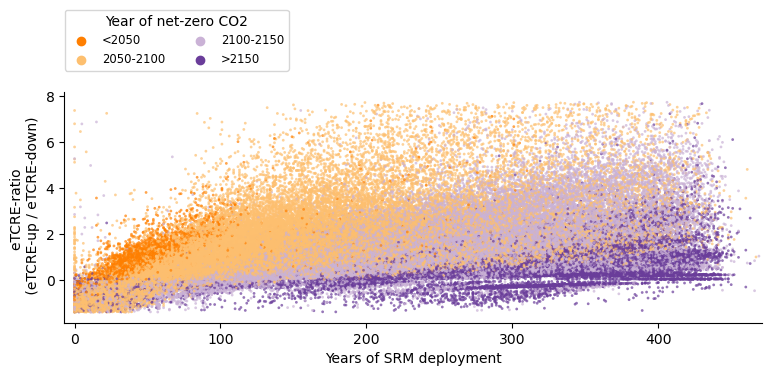

<IPython.core.display.Javascript object>

In [10]:
fig, ax = plt.subplots(figsize=(9, 3))

sns.scatterplot(
    x="SRM_at_first_crossing",
    y="TCRE_ratio_up",
    data=data_all,
    hue="Year of net-zero CO2",
    ec=None,
    s=4,
    alpha=0.7,
    palette=colors_netzero,
    legend=True,
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlim(-7, 471)
# plt.ylim(-2.7, 12)
plt.legend(
    title="Year of net-zero CO2",
    fontsize="small",
    #  fancybox=True,
    bbox_to_anchor=(0.33, 1.38),
    ncol=2,
)
plt.xlabel("Years of SRM deployment")
# plt.xlabel("eTCRE-up / eTCRE-down")
plt.ylabel("eTCRE-ratio \n (eTCRE-up / eTCRE-down)")

plt.savefig(str(Path(utils.PLOTS_DIR / "SI" / f"{ID}_S02.png")), bbox_inches="tight")
plt.show()